# Airbnb en Europe

## Importation des packages et du dataset

In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error, ConfusionMatrixDisplay, classification_report

In [3]:
df = pd.read_csv("C:/Users/User/Downloads/Airbnb_RNCP_database.csv")

In [4]:
df.head()

,City,Price,Day,Room Type,Person Capacity,Superhost,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km)
0,Amsterdam,194.033698,Weekday,Private room,2.0,False,93.0,1,5.022964,2.539380
1,Amsterdam,344.245776,Weekday,Private room,4.0,False,85.0,1,0.488389,0.239404
2,Amsterdam,264.101422,Weekday,Private room,2.0,False,87.0,1,5.748312,3.651621
3,Amsterdam,433.529398,Weekday,Private room,4.0,False,90.0,2,0.384862,0.439876
4,Amsterdam,485.552926,Weekday,Private room,2.0,True,98.0,1,0.544738,0.318693


Ce dataset recense des annonces de la plateforme Airbnb en Europe et fournit pour chacune d'elles les informations suivantes :
* `City` : ville,
* `Price` : prix de la nuit,
* `Day` : semaine (`Weekday`) ou week-end (`Weekend`),
* `Room Type` : chambre privée (`Private room`), chambre partagée (`Shared room`) ou logement entier (`Entire home/apt`),
* `Person Capacity` : nombre de personnes acceptées,
* `Superhost` : super-hôte (`1`) ou non (`0`),
* `Guest Satisfaction` : note moyenne (sur 100),
* `Bedrooms` : nombre de chambres,
* `City Center (km)` : distance au centre-ville (en km),
* `Metro Distance (km)` : distance au métro (en km).

## Analyse de la qualité du dataset

**Q1. Le dataset comporte-t-il des valeurs manquantes ?**

*Puis procéder au nettoyage nécessaire le cas échéant.*

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 41714 non-null  object 
 1   Price                41714 non-null  float64
 2   Day                  41714 non-null  object 
 3   Room Type            41714 non-null  object 
 4   Person Capacity      41714 non-null  float64
 5   Superhost            41714 non-null  bool   
 6   Guest Satisfaction   41714 non-null  float64
 7   Bedrooms             41714 non-null  int64  
 8   City Center (km)     41714 non-null  float64
 9   Metro Distance (km)  41714 non-null  float64
dtypes: bool(1), float64(5), int64(1), object(3)
memory usage: 2.9+ MB
None


In [6]:
#Dans cette bout de code on ratifie que il n'y a pas des valeurs manquantes affiches d'une autre facon soit: 'UNKNOWN, NA, '', ' '', ETC
print(df.Day.unique())
print(df.City.unique())
print(df['Room Type'].unique())
print(df.Bedrooms.unique())
print(df['Guest Satisfaction'].unique())
print(df.Superhost.unique())

['Weekday' 'Weekend']
['Amsterdam' 'Athens' 'Barcelona' 'Berlin' 'Budapest' 'Lisbon' 'Paris'
 'Rome' 'Vienna']
['Private room' 'Entire home/apt' 'Shared room']
[ 1  2  3  0  5  4  6  9 10]
[ 93.  85.  87.  90.  98. 100.  94.  96.  88.  97.  95.  89.  91.  84.
  77.  99.  80.  92.  82.  78.  86.  74.  81.  83.  73.  76.  75.  70.
  65.  47.  60.  20.  40.  72.  79.  68.  57.  56.  67.  50.  53.  63.
  71.  66.  64.  69.  62.  30.  44.  55.  54.]
[False  True]


**Q2. Dresser un boxplot de la variable `Price`. Certaines valeurs peuvent-elles être considérées commes des outliers ?**

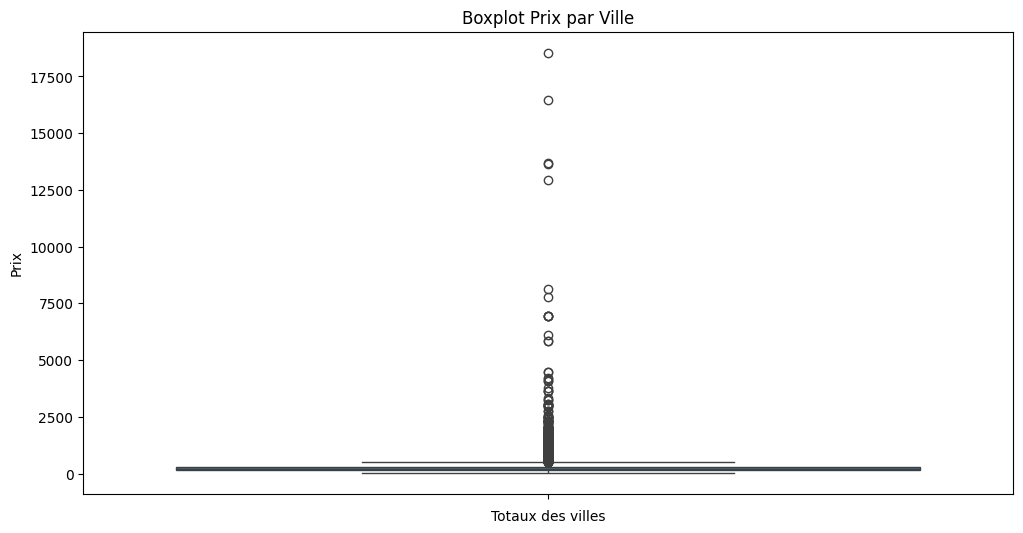

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot( y='Price', data=df)
plt.title('Boxplot Prix par Ville')
plt.xlabel('Totaux des villes')
plt.ylabel('Prix')
plt.show()

Nous allons nous concentrer sur les annonces dont le prix est inférieur à 1000€ :

In [8]:
df = df[df["Price"] <= 1000].reset_index(drop=True)

**Q3. Dresser un boxplot de la variable `Price` dans cette configuration. Quel est le prix moyen sur l'ensemble des logements ?**

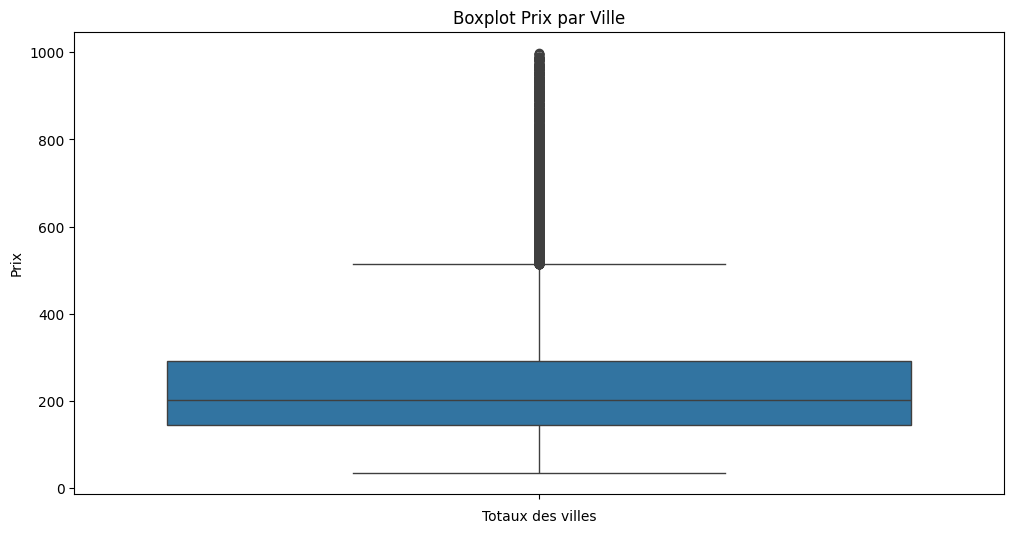

Le prix moyen par chambre, toutes villes confondues, est de $243.45


In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot( y='Price', data=df)
plt.title('Boxplot Prix par Ville')
plt.xlabel('Totaux des villes')
plt.ylabel('Prix')
plt.show()

average_price = df['Price'].mean()
print(f'Le prix moyen par chambre, toutes villes confondues, est de ${average_price:.2f}')

**Q4. Quelles sont les villes les plus représentées dans le dataset ?**

In [10]:
rank = df['City'].value_counts().sort_values(ascending=False).head(4)

print(f'Les 4 villes les plus représentatives de lensemble des données sont les suivantes: {rank}')

Les 4 villes les plus représentatives de lensemble des données sont les suivantes: City
Rome      9004
Paris     6504
Lisbon    5760
Athens    5277
Name: count, dtype: int64


Dans la suite, nous conserverons uniquement les annonces issues des quatre villes les plus représentées :

In [21]:
cities = df["City"].value_counts().head(4).index.tolist()
best_cities = df[df["City"].isin(cities)].reset_index(drop=True)

best_cities.head()

,City,Price,Day,Room Type,Person Capacity,Superhost,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km)
0,Athens,129.824479,Weekday,Entire home/apt,4.0,False,100.0,2,2.813964,0.881890
1,Athens,138.963748,Weekday,Entire home/apt,4.0,True,96.0,1,0.407293,0.304568
2,Athens,156.304923,Weekday,Entire home/apt,3.0,True,98.0,1,1.237211,0.288488
3,Athens,91.627024,Weekday,Entire home/apt,4.0,True,99.0,1,4.367457,0.297467
4,Athens,74.051508,Weekday,Private room,2.0,False,100.0,1,2.194185,0.385266


## Exploratory Data Analysis (EDA)

**Q5. Analyser la distribution globale des prix avec un histogramme.**

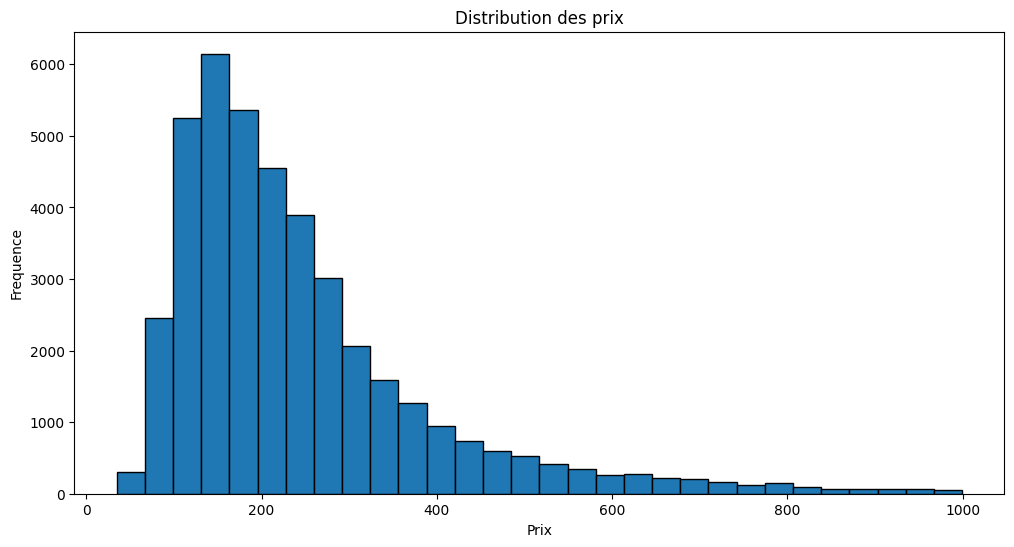

In [12]:
plt.figure(figsize=(12, 6))
plt.hist(df['Price'], bins=30, edgecolor='k')
plt.title('Distribution des prix')
plt.xlabel('Prix')
plt.ylabel('Frequence')
plt.show()

**Q6. Analyser la distribution des variables `Person Capacity`, `Guest Satisfaction` et `City Center (km)`.**

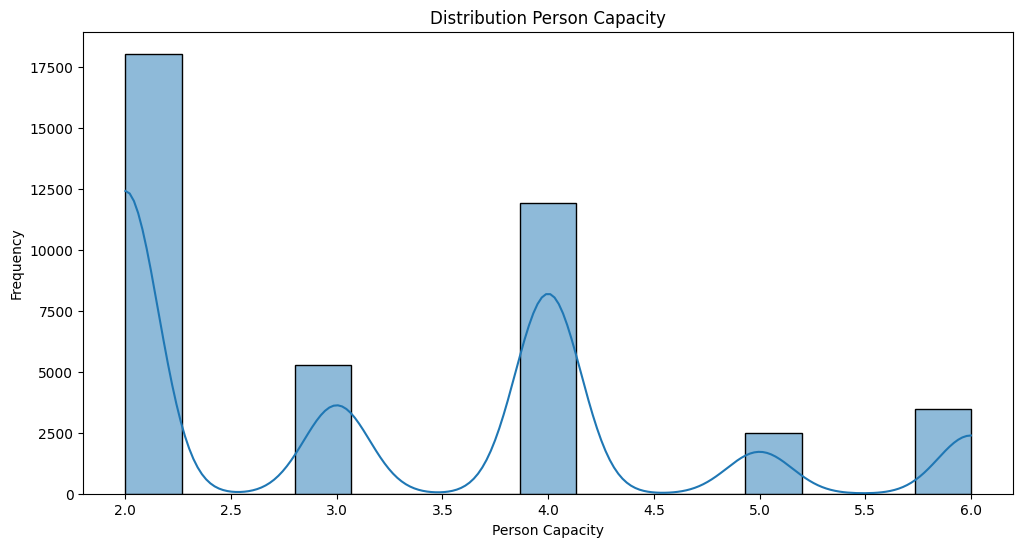

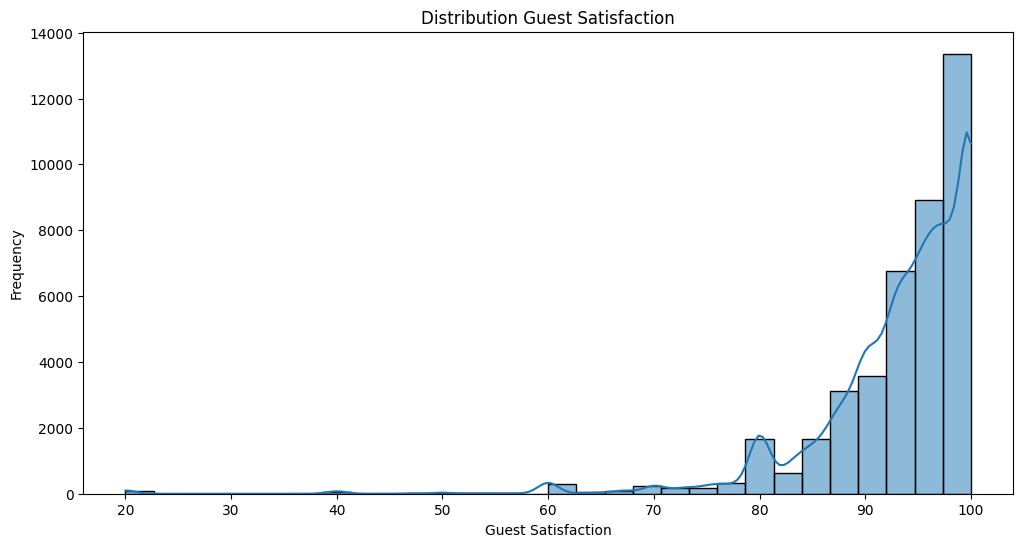

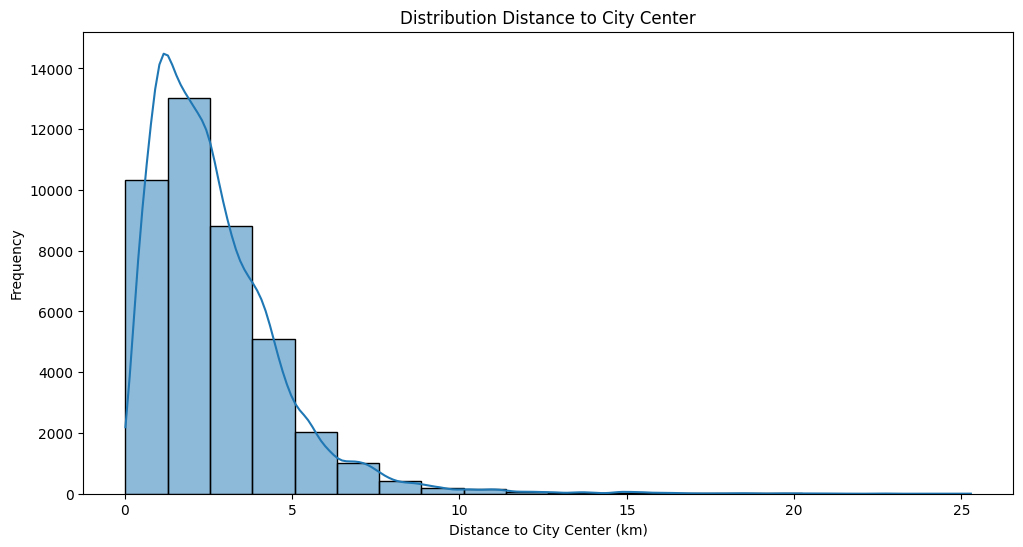

In [13]:
# Distribution du Person Capacity

plt.figure(figsize=(12, 6))
sns.histplot(df['Person Capacity'], bins=15, kde=True)
plt.title('Distribution Person Capacity')
plt.xlabel('Person Capacity')
plt.ylabel('Frequency')
plt.show()

# Distribution du Guest Satisfaction

plt.figure(figsize=(12, 6))
sns.histplot(df['Guest Satisfaction'], bins=30, kde=True)
plt.title('Distribution Guest Satisfaction')
plt.xlabel('Guest Satisfaction')
plt.ylabel('Frequency')
plt.show()

# Distribution du Distance to City Center

plt.figure(figsize=(12, 6))
sns.histplot(df['City Center (km)'], bins=20, kde=True)
plt.title('Distribution Distance to City Center')
plt.xlabel('Distance to City Center (km)')
plt.ylabel('Frequency')
plt.show()

**Q7. Analyser les prix pour chaque ville. Laquelle semble afficher les prix les plus hauts ?**

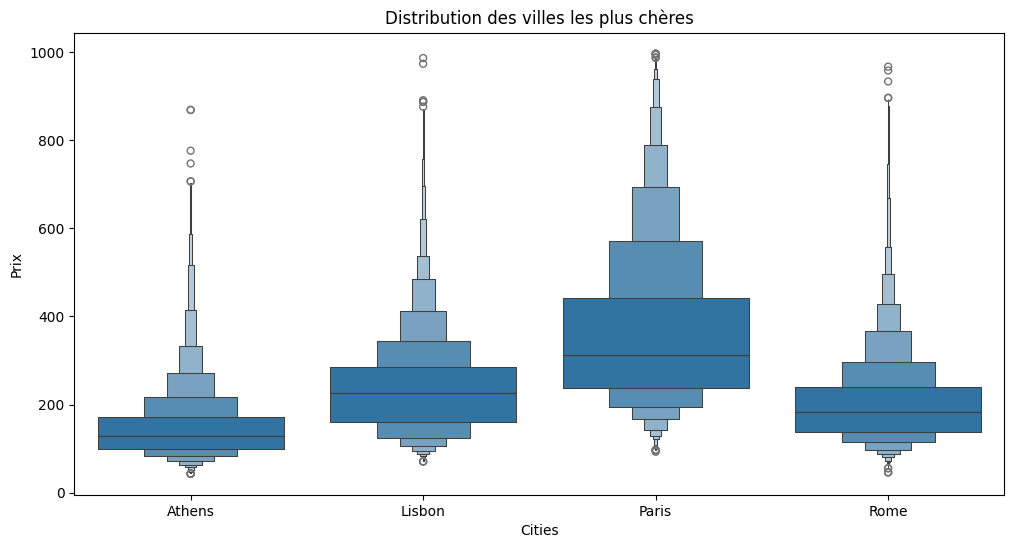

Les villes les plus chères sont: City
Paris     360.294924
Lisbon    237.629272
Rome      202.058073
Athens    147.920589
Name: Price, dtype: float64


In [15]:
prix = best_cities.groupby('City')['Price'].mean()

expensive = prix.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.boxenplot(x='City', y='Price', data=best_cities)
plt.title('Distribution des villes les plus chères')
plt.xlabel('Cities')
plt.ylabel('Prix')
plt.show()

print(f'Les villes les plus chères sont: {expensive}')

*Pour la question suivante, nous sélectionnons les annonces concernant la location d'un logement avec 3 chambres, le week-end à Athènes :*

In [61]:
df_athens_weekend_b3 = df[(df["City"] == "Athens") & (df["Day"] == "Weekend") & (df["Bedrooms"] == 3)]

**Q8. Analyser la relation entre le prix d'un logement et son éloignement par rapport au centre de la ville à partir des données de `df_athens_weekend_b3`.**

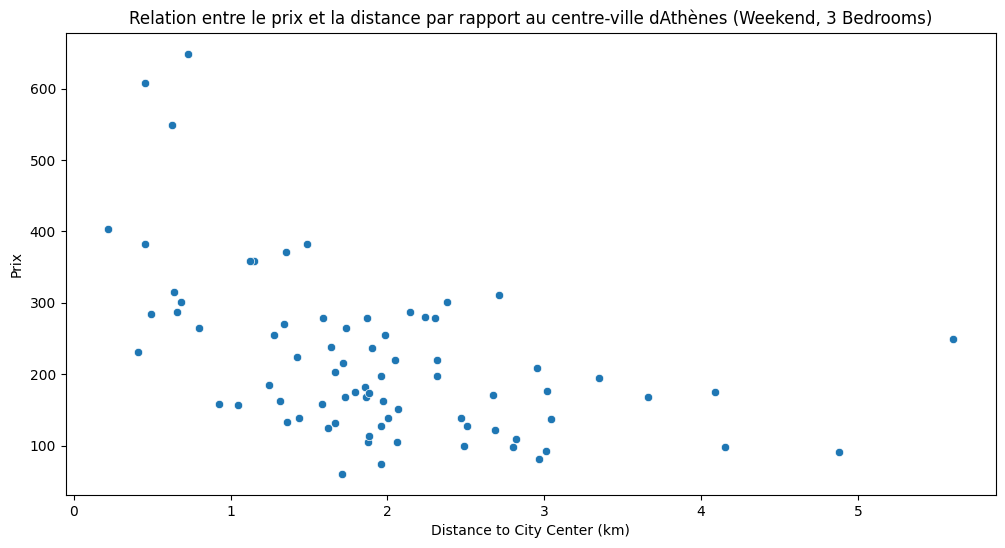

Le coefficient de corrélation entre le prix et la distance au centre ville est de -0.49


In [62]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='City Center (km)', y='Price', data=df_athens_weekend_b3)
plt.title('Relation entre le prix et la distance par rapport au centre-ville dAthènes (Weekend, 3 Bedrooms)')
plt.xlabel('Distance to City Center (km)')
plt.ylabel('Prix')
plt.show()

correlation = df_athens_weekend_b3['Price'].corr(df_athens_weekend_b3['City Center (km)'])
print(f'Le coefficient de corrélation entre le prix et la distance au centre ville est de {correlation:.2f}')

*Nous reprenons désormais le DataFrame `df`.*

**Q9. Analyser l'influence de la variable `Room Type` sur le prix d'un logement.**

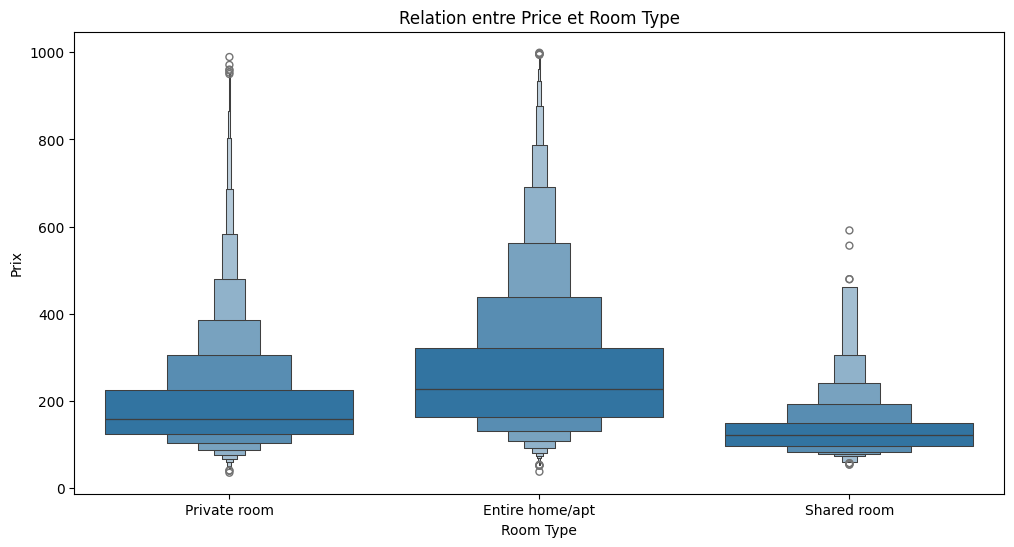

In [63]:
plt.figure(figsize=(12, 6))
sns.boxenplot(x='Room Type', y='Price', data=df)
plt.title('Relation entre Price et Room Type')
plt.xlabel('Room Type')
plt.ylabel('Prix')
plt.show()

## Normalisation et encodage des variables

**Q10. Convertir les variables `Superhost`, `Day`, `City` et `Room Type` avec une méthode appropriée.**

In [22]:
# Ici, nous convertissons le booléen True/False en 0 et 1.
df['Superhost'] = df['Superhost'].astype(int)

# Ici, nous allons attribuer 0 pour les locations en semaine et 1 pour les locations en week-end.
df['Day'] = df['Day'].map({'Weekday': 0, 'Weekend': 1})

# Nous allons énumérer les villes de 0 à la fin des valeurs.
city_mapping = {city: idx for idx, city in enumerate(df['City'].unique())}
df['City'] = df['City'].map(city_mapping)

# Ici, nous énumérons les types de pièces de 0 à la fin des valeurs.
room_type_mapping = {room_type: idx for idx, room_type in enumerate(df['Room Type'].unique())}
df['Room Type'] = df['Room Type'].map(room_type_mapping)

# Nous exécutons ce code afin de permettre à l'algorithme d'interpréter les informations contenues dans la base de données afin de faire des prédictions plus précises.

df.describe()

,City,Price,Day,Room Type,Person Capacity,Superhost,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km)
count,41238.000000,41238.000000,41238.000000,41238.000000,41238.000000,41238.000000,41238.000000,41238.000000,41238.000000,41238.000000
mean,4.691450,243.450953,0.499054,0.690189,3.225253,0.280033,93.082206,1.155124,2.683718,0.605125
std,2.416529,149.035838,0.500005,0.478706,1.295029,0.449020,8.148662,0.626559,2.000259,0.708277
min,0.000000,34.779339,0.000000,0.000000,2.000000,0.000000,20.000000,0.000000,0.015059,0.002301
25%,3.000000,143.365839,0.000000,0.000000,2.000000,0.000000,90.000000,1.000000,1.277552,0.237076
50%,5.000000,202.480974,0.000000,1.000000,3.000000,0.000000,95.000000,1.000000,2.259660,0.392317
75%,7.000000,291.499674,1.000000,1.000000,4.000000,1.000000,98.000000,1.000000,3.587169,0.679472
max,8.000000,999.226677,1.000000,2.000000,6.000000,1.000000,100.000000,10.000000,25.284557,14.273577


**Q11. Analyser les ordres de grandeur des différentes variables numériques (sauf le prix). Appliquer un traitement si nécessaire.**

In [41]:
df.columns

Index(['City', 'Price', 'Day', 'Room Type', 'Person Capacity', 'Superhost',
       'Guest Satisfaction', 'Bedrooms', 'City Center (km)',
       'Metro Distance (km)'],
      dtype='object')

In [65]:
# Première étape : nous allons analyser les colonnes numériques

numerical_columns = ['Guest Satisfaction', 'Bedrooms', 'Person Capacity', 'City Center (km)', 'Metro Distance (km)']
df[numerical_columns].describe()

,Guest Satisfaction,Bedrooms,Person Capacity,City Center (km),Metro Distance (km)
count,41238.000000,41238.000000,41238.000000,41238.000000,41238.000000
mean,93.082206,1.155124,3.225253,2.683718,0.605125
std,8.148662,0.626559,1.295029,2.000259,0.708277
min,20.000000,0.000000,2.000000,0.015059,0.002301
25%,90.000000,1.000000,2.000000,1.277552,0.237076
50%,95.000000,1.000000,3.000000,2.259660,0.392317
75%,98.000000,1.000000,4.000000,3.587169,0.679472
max,100.000000,10.000000,6.000000,25.284557,14.273577


* Nous constatons que la variance de chaque colonne numérique semble plus ou moins similaire, de sorte que la méthode de normalisation appropriée serait un MinMaxScaler.

In [70]:
# Deuxième étape : Normaliser les colonnes numériques
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df.describe()

,City,Price,Day,Room Type,Person Capacity,Superhost,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km)
count,41238.000000,41238.000000,41238.000000,41238.000000,41238.000000,41238.000000,41238.000000,41238.000000,41238.000000,41238.000000
mean,4.691450,243.450953,0.499054,0.690189,0.306313,0.280033,0.913528,0.115512,0.105608,0.042240
std,2.416529,149.035838,0.500005,0.478706,0.323757,0.449020,0.101858,0.062656,0.079157,0.049630
min,0.000000,34.779339,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,143.365839,0.000000,0.000000,0.000000,0.000000,0.875000,0.100000,0.049961,0.016451
50%,5.000000,202.480974,0.000000,1.000000,0.250000,0.000000,0.937500,0.100000,0.088826,0.027329
75%,7.000000,291.499674,1.000000,1.000000,0.500000,1.000000,0.975000,0.100000,0.141361,0.047450
max,8.000000,999.226677,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Création du train et du test set

**Q12. Séparer les données en données d'entraînement et en données de test.**

*On réservera par exemple 20% des données pour le test.*

*Stocker ces données dans des variables `X_train`, `X_test`, `y_train` et `y_test`*

In [71]:
X = df.drop(columns=['Price'])
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X_train: {X_train.shape[0] / df.shape [0]}')
print(f'X_test: {X_test.shape[0] / df.shape [0]}')
print(f'y_train: {y_train.shape[0] / df.shape [0]}')
print(f'y_test: {y_test.shape[0] / df.shape [0]}')

X_train: 0.7999903002085456
X_test: 0.20000969979145447
y_train: 0.7999903002085456
y_test: 0.20000969979145447


**Q13. Les données sont-elles en nombre suffisant pour implémenter une régression linéaire ? Un arbre de décision ?**

Nous disposons d'un nombre suffisant de points de données pour mettre en œuvre un modèle de régression linéaire et un modèle d'arbre de décision. Avec 32 990 échantillons d'apprentissage et 9 caractéristiques, votre ensemble de données est bien adapté aux deux types de modèles. Voici un résumé concis :

* Régression linéaire : Plus de données qu'il n'en faut.

* Arbre de décision : Suffisamment de données pour construire un modèle robuste.
Les deux modèles doivent être en mesure d'obtenir de bons résultats compte tenu de la taille de votre ensemble de données.

## Régression linéaire

**Q14. Implémenter une régression linéaire pour prédire le prix d'une annonce en fonction de toutes les autres variables sur les données d'entraînement et commenter les performances du modèle.**

Mean Squared Error: 20721.553425315808
R-squared: 0.10757254297423646


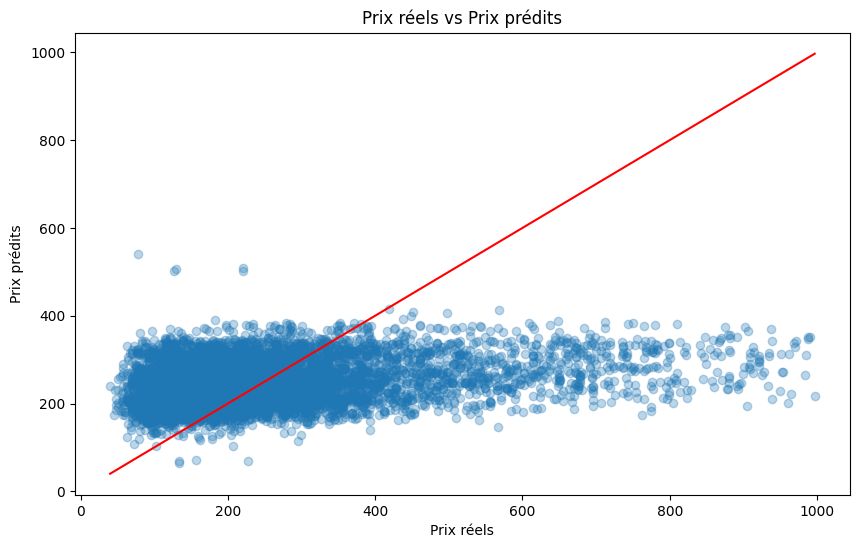

In [73]:
linear_regressor = LinearRegression()

linear_regressor.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = linear_regressor.predict(X_test)

# Ici, nous calculons les mesures de performance
linear_regressor_mse = mean_squared_error(y_test, y_pred)
linear_regressor_r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {linear_regressor_mse}")
print(f"R-squared: {linear_regressor_r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Prix réels')
plt.ylabel('Prix prédits')
plt.title('Prix réels vs Prix prédits')
plt.show()

### Interprétation du graphique : Prix réel par rapport au prix prédit Le graphique fourni est un nuage de points qui compare le prix réel (prix réel) avec le prix prédit du modèle de régression linéaire (prix prédit).
 L'interprétation détaillée est la suivante : 
 
 **1. Points du nuage de points** : - Chaque point bleu représente un point de données où la coordonnée x est le prix réel et la coordonnée y est le prix prévu.
 – La densité et la dispersion de ces points vous indiquent les performances de votre modèle.
 
 **2. Ligne rouge** : – La ligne rouge représente la ligne de prévision parfaite (y = x) où le prix prévu correspond exactement au prix réel.
 – Les points  sur cette ligne indiquent des prédictions parfaites.
 ### Principales conclusions 
 
 **1. Groupes de points** : - La plupart des points de données sont regroupés autour du prix réel le plus bas (environ 0 à 200).
 – Le modèle a tendance à prédire des valeurs dans cette fourchette quel que soit le prix réel, ce qui suggère que le modèle peut être biaisé en faveur de la prévision de valeurs inférieures.
 
 **2. Plage et variance** : - À mesure que le prix réel augmente (au-dessus de 200), le prix prévu n'augmente pas proportionnellement.
 – L’écart et l’écart par rapport à la ligne rouge augmentent, surtout si les prix réels augmentent.
 – Cela indique que le modèle a du mal à prédire avec précision des prix plus élevés et a tendance à sous-estimer ces valeurs.

 **3. Sous-prédiction** : – De nombreux points se situent en dessous de la ligne rouge, en particulier lorsque le prix réel est élevé, ce qui indique que le modèle sous-prédit systématiquement.
 – Cette sous-estimation est plus prononcée lorsque les prix réels sont élevés, ce qui suggère que les modèles linéaires sont incapables de capturer la complexité des données et les relations non linéaires.

In [77]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test) 
model = sm.OLS(y_train, X_train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     445.5
Date:                Fri, 21 Jun 2024   Prob (F-statistic):               0.00
Time:                        12:27:41   Log-Likelihood:            -2.0982e+05
No. Observations:               32990   AIC:                         4.197e+05
Df Residuals:                   32980   BIC:                         4.197e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 144.1158    

Sommaire 

* Le modèle explique environ 10,8 % de la variation des prix, ce qui est relativement faible. Cela suggère qu’il pourrait y avoir d’autres prédicteurs importants non inclus dans le modèle.
* La plupart des variables prédictives sont statistiquement significatives, ce qui indique qu'elles ont un impact significatif sur le prix.
* La statistique F élevée et la faible valeur p suggèrent que le modèle est globalement significatif.
* Les coefficients négatifs pour le centre-ville (km) et la distance en métro (km) indiquent que les propriétés plus éloignées du centre-ville ou de la station de métro ont tendance à être moins chères.
* Les résidus du modèle présentent des signes de non-normalité et d'asymétrie potentielle qui peuvent affecter la fiabilité des coefficients.
* Vous pourriez envisager d'explorer davantage de fonctionnalités et d'interactions ou d'utiliser des modèles plus complexes pour améliorer votre pouvoir prédictif.
 


## Arbre de régression

**Q15. Implémenter un arbre de régression, sans préciser d'hyperparamètre.**

*L'implémentation se fait de la même manière que pour un arbre de décision classique, mais en utilisant la classe `DecisionTreeRegressor` du module `sklearn.tree`.*

In [78]:
tree_regressor = DecisionTreeRegressor(random_state=42)

tree_regressor.fit(X_train, y_train)

y_pred_tree = tree_regressor.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Mean Squared Error: {mse_tree}")
print(f"R-squared: {r2_tree}")

Mean Squared Error: 8173.833285003946
R-squared: 0.6479726638748639


**Q16. Afficher les trois premières couches de l'arbre. Quelles semblent être les variables les plus importantes dans le processus de décision ?**

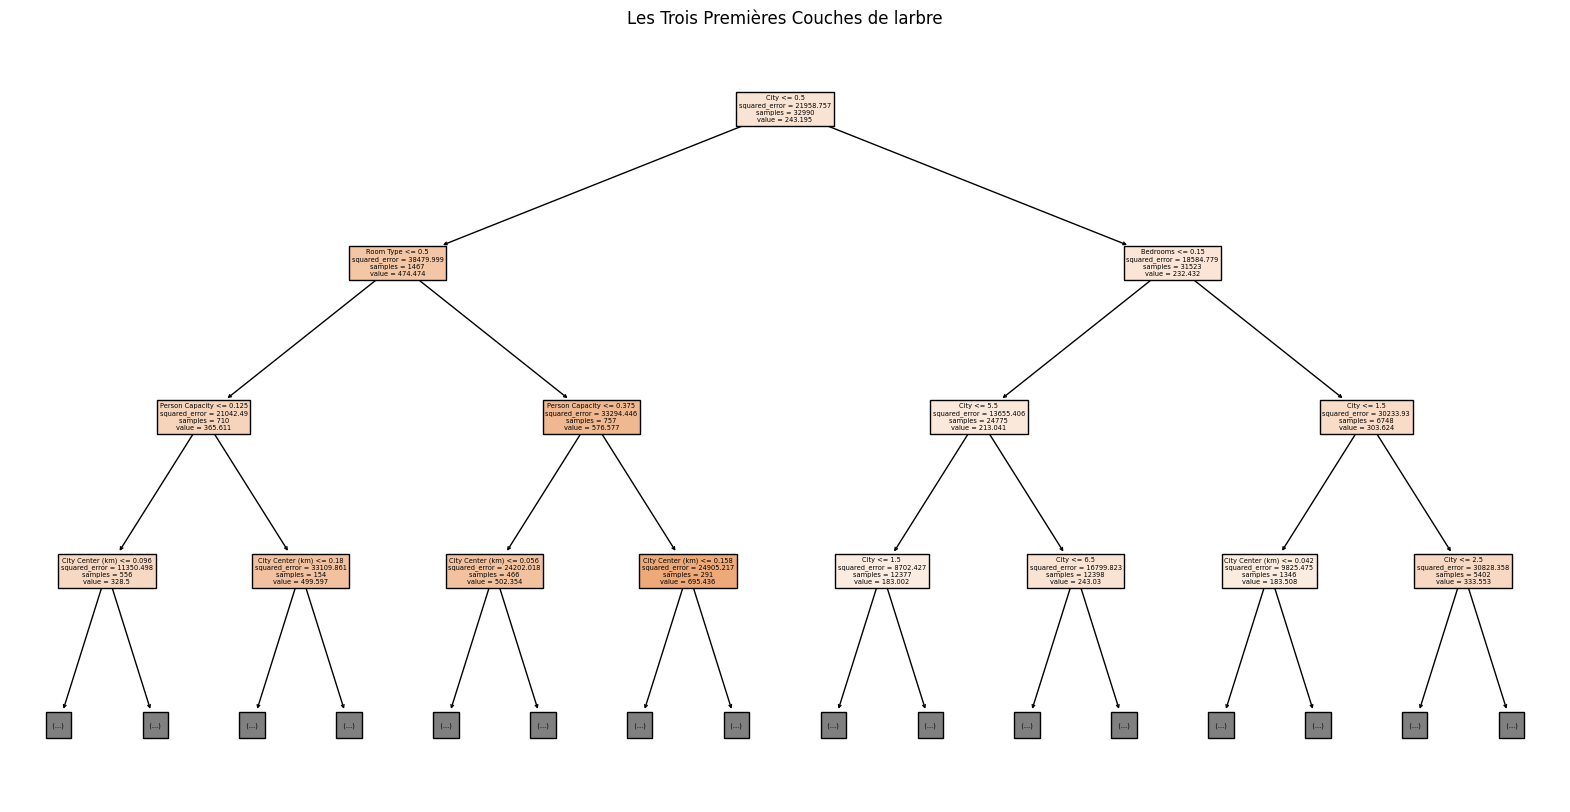

Les variables les plus importantes:
City                   0.383394
City Center (km)       0.187463
Metro Distance (km)    0.131492
Bedrooms               0.075521
Room Type              0.071245
Person Capacity        0.070817
Guest Satisfaction     0.065345
Superhost              0.009125
Day                    0.005599
dtype: float64


In [100]:

plt.figure(figsize=(20, 10))
plot_tree(tree_regressor, max_depth=3, feature_names=X.columns, filled=True)
plt.title('Les Trois Premières Couches de larbre')
plt.show()

feature_importances = tree_regressor.feature_importances_
important_features = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)

print("Les variables les plus importantes:")
print(important_features)


**Q17. Comparer les performances de ce modèle par rapport à celles de la régression linéaire précédente.**

In [92]:
print(f"Linear Regression Mean Squared Error: {linear_regressor_mse}")
print(f"Linear Regression R-squared: {linear_regressor_r2}")
print(f"--------------------------------------------------------------")
print(f"Decision Tree Regression Mean Squared Error: {mse_tree}")
print(f"Decision Tree Regression R-squared: {r2_tree}")

Linear Regression Mean Squared Error: 20721.553425315808
Linear Regression R-squared: 0.10757254297423646
--------------------------------------------------------------
Decision Tree Regression Mean Squared Error: 8102.908610846364
Decision Tree Regression R-squared: 0.6510272189702122


#### Résumé :

* Précision : Le modèle de régression par arbre de décision présente une précision significativement supérieure à celle du modèle de régression linéaire, comme le démontre son MSE plus bas.

* Le modèle de régression par arbre décisionnel explique une part significativement plus élevée de la variance des prix d'Airbnb (64,8 %) que le modèle de régression linéaire (10,8 %).

**Q18. Reprendre le modèle précédent en choisissant `max_depth=15`. Quelle est la conséquence de la modification précédente sur les performances du modèle ?**

In [95]:
tree_regressor_depth_15 = DecisionTreeRegressor(max_depth=15, random_state=42)
tree_regressor_depth_15.fit(X_train, y_train)

y_pred_tree_depth_15 = tree_regressor_depth_15.predict(X_test)

mse_tree_depth_15 = mean_squared_error(y_test, y_pred_tree_depth_15)
r2_tree_depth_15 = r2_score(y_test, y_pred_tree_depth_15)

print(f"Decision Tree Regression with max_depth=15 Mean Squared Error: {mse_tree_depth_15}")
print(f"Decision Tree Regression with max_depth=15 R-squared: {r2_tree_depth_15}")
print(f"--------------------------------------------------------------")
print(f"Decision Tree Regression Mean Squared Error: {mse_tree}")
print(f"Decision Tree Regression R-squared: {r2_tree}")

Decision Tree Regression with max_depth=15 Mean Squared Error: 8167.870420678727
Decision Tree Regression with max_depth=15 R-squared: 0.6482294700967295
--------------------------------------------------------------
Decision Tree Regression Mean Squared Error: 8102.908610846364
Decision Tree Regression R-squared: 0.6510272189702122


#### En conclusion :

* Le modèle sans spécification de max_depth présente une valeur du R au carré légèrement plus élevée, ce qui suggère que ce modèle explique un peu plus de variance dans la variable cible que le modèle avec max_depth=15.
Les valeurs du R au carré ne diffèrent que très peu, ce qui suggère que les deux modèles ont un pouvoir predictif équivalent.


## Random Forest Regressor

**Q19. Implémenter une Random Forest avec la classe `RandomForestRegressor` sans préciser d'hyperparamètres. Quel effet constatez-vous sur les performances du modèle ?**

In [101]:
random_forest_regressor = RandomForestRegressor(random_state=42)
random_forest_regressor.fit(X_train, y_train)
y_pred_rf = random_forest_regressor.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)


feature_importances_rf = random_forest_regressor.feature_importances_
important_features_rf = pd.Series(feature_importances_rf, index=X.columns).sort_values(ascending=False)

print(f"Random Forest Regression Mean Squared Error: {mse_rf}")
print(f"Random Forest Regression R-squared: {r2_rf}")
print(f"--------------------------------------------------------------")
print("Les variables les plus importantes du model Random Forest:")
print(important_features_rf)


Random Forest Regression Mean Squared Error: 5039.854699219215
Random Forest Regression R-squared: 0.7829455822791432
--------------------------------------------------------------
Les variables les plus importantes du model Random Forest:
City                   0.376226
City Center (km)       0.185561
Metro Distance (km)    0.132458
Person Capacity        0.090133
Guest Satisfaction     0.067936
Room Type              0.066930
Bedrooms               0.061806
Superhost              0.010953
Day                    0.007996
dtype: float64


**Q20. Implémenter une méthode permettant d'optimiser les valeurs des hyperparamètres `n_estimators` et `max_depth`.**

In [102]:
""" param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None]
}

rf_regressor = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, 
                           cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

# Ici on compte a obtenir les paramètres les plus appropriés et le modèle le plus approprié.
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

y_pred_best_rf = best_rf_model.predict(X_test)

# La on va evaluer les critères de performance
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)


print(f"Hyperparamètres optimales: {best_params}")
print(f"Meilleur Random Forest Regression Mean Squared Error: {mse_best_rf}")
print(f"Meilleur Random Forest Regression R-squared: {r2_best_rf}") """

Hyperparamètres optimales: {'max_depth': 30, 'n_estimators': 200}
Meilleur Random Forest Regression Mean Squared Error: 5055.981980242833
Meilleur Random Forest Regression R-squared: 0.7822510190822034


#### En conclusion.

* Par défaut, le modèle Random Forest est extrêmement efficace, comme en témoignent son MSE plus
bas et sa valeur R-carré marginalement supérieure par rapport au modèle optimisé. Cela laisse
entendre que les paramètres par défaut (max_depth et n_estimators) offrent déjà un équilibre
satisfaisant entre le biais et la variance pour cette série de données.
* La faible variation des indicateurs de performance après l'ajustement des hyperparamètres suggère
que la performance du modèle n'est pas très influencée par les modifications de max_depth et
n_estimators. Il est possible que cela indique que l'algorithme Random Forest est fiable pour votre jeu
de données ou que le jeu de données lui-même ne tire pas de bénéfices significatifs de l'ajustement de
ces hyperparamètres spécifiques.


**Q21. Au total, combien d'arbres ont dû être générés lors de la phase d'optimisation précédente ?**

In [103]:
trees_50 = 50 * 5 * 4
trees_100 = 100 * 5 * 4
trees_200 = 200 * 5 * 4


total_trees = trees_50 + trees_100 + trees_200

total_trees

7000

Nombre total d'arbres générés : 7000

**Q22. Quel modèle présente les meilleures performances ? Etait-ce attendu ?**

#### Meilleur modèle :

Le principe de la régression Parmi tous les modèles évalués, Random Forest est le modèle le plus efficace.
Les raisons de la performance optimale :

* Approche globale : La méthode Random Forest associe différents arbres de décision, ce qui favorise une généralisation améliorée et réduit l'ajustement excessif.

Analyse comparée aux attentes :

* Régression linéaire : Il était prévu que la régression linéaire soit la moins efficace car elle implique une relation linéaire entre les caractéristiques et la variable cible, ce qui n'est souvent pas le cas dans les ensembles de données complexes.

* Les résultats de la régression par arbre de décision sont supérieurs à ceux de la régression linéaire, mais inférieurs à ceux de la forêt aléatoire, car elle est susceptible d'être surajustée, surtout en l'absence de contraintes de profondeur.

* Régression par Random Forest: Les meilleurs résultats ont été obtenus grâce à la régression par Random Forest, qui a la capacité de réduire le surajustement et de gérer les relations non linéaires grâce à l'apprentissage global. Les performances ont été encore renforcées par la version optimisée qui a ajusté le nombre d'arbres et la profondeur de chaque arbre.

#### Conclusion

Le principe de la régression Random Forest est le choix optimal pour prédire les prix Airbnb dans cette base de données. Les bénéfices propres aux forêts aléatoires et les bénéfices supplémentaires obtenus par l'optimisation des hyperparamètres étaient à l'origine de ce résultat. Ce résultat correspond aux connaissances courantes en apprentissage automatique, où les méthodes globales telles que les forêts aléatoires sont souvent plus efficaces que les modèles individuels, et où l'optimisation des hyperparamètres est essentielle pour obtenir les meilleures performances.


**Q23. Un propriétaire souhaite proposer son logement sur Airbnb. L'annonce fait mention des caractéristiques suivantes. Quel prix peut-il espérer en tirer ?**

`{'City': 'Lisbon',
'Day': 'Weekend',
'Room Type': 'Entire home/apt',
'Person Capacity': 4,
'Superhost': False,
'Guest Satisfaction': 95,
'Bedrooms': 2,
'City Center (km)': 1.75,
'Metro Distance (km)': 0.2}`

*Indication : créer un DataFrame constitué d'une ligne à partir des données ci-dessus puis appliquer les étapes de pre-processing nécessaire avant d'effectuer la prédiction.*

In [107]:
new_airbnb = {
    'City': ['Lisbon'],
    'Day': ['Weekend'],
    'Room Type': ['Entire home/apt'],
    'Person Capacity': [4],
    'Superhost': [False],
    'Guest Satisfaction': [95],
    'Bedrooms': [2],
    'City Center (km)': [1.75],
    'Metro Distance (km)': [0.2]
}

new_df = pd.DataFrame(new_airbnb)

categories = ['City', 'Day', 'Room Type', 'Superhost']

# On utilise le OneHotEncoder pour les caractéristiques de chaque catégorie.
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_cats = encoder.fit(X[categories])
encoded_new_data = encoder.transform(new_df[categories]).toarray()
encoded_new_df = pd.DataFrame(encoded_new_data, columns=encoder.get_feature_names_out(categories))

# On ajoute des colonnes codées en supprimant les colonnes catégorielles d'origine.
new_df = new_df.drop(columns=categories)
new_df = pd.concat([new_df.reset_index(drop=True), encoded_new_df.reset_index(drop=True)], axis=1)

# On fait en sorte que l'organisation des colonnes est en accord avec les données d'apprentissage.
X_columns = X.columns 
new_df = new_df.reindex(columns=X_columns, fill_value=0)

# On prédit en utilisant le modèle Random Forest le plus approprié
predicted_price = best_rf_model.predict(new_df)

# Prediction de prix
print(f"Le prix prédit pour cet AirBnB est de: ${predicted_price[0]:.2f} la nuit")


Le prix prédit pour cet AirBnB est de: $363.86 la nuit
